In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('C:/Users/Jay/Desktop/Python/Projects/DS_Salary/glassdoor_jobs.csv')

In [3]:
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 15 columns):
Unnamed: 0           956 non-null int64
Job Title            956 non-null object
Salary Estimate      956 non-null object
Job Description      956 non-null object
Rating               956 non-null float64
Company Name         956 non-null object
Location             956 non-null object
Headquarters         956 non-null object
Size                 956 non-null object
Founded              956 non-null int64
Type of ownership    956 non-null object
Industry             956 non-null object
Sector               956 non-null object
Revenue              956 non-null object
Competitors          956 non-null object
dtypes: float64(1), int64(2), object(12)
memory usage: 112.2+ KB


# Cleaning data

In [5]:
#salary
df['Salary Estimate'].value_counts()

#splitting into range and text
#with expand = True we can access both the splits differently
#s[0] contains range which we will further modify and s[1] contains 'glassdoor est' which is not needed 
s=df['Salary Estimate'].str.split('(',expand=True)

s[0]

#replacing $ and K by ''
s[0]=s[0].str.replace('$','')
s[0]=s[0].str.replace('K','')
s[0]

k=s[0].str.split('-',expand=True)

k

#we see that k[0] has some spaces, this is because of the -1 values that were present in the dataset
#replacing those spaces by 1
k[0]=np.where(k[1]=='1',1,k[0])

k

k.isnull().sum()

k.dtypes

#since k is of object type, we will convert it to numeric
k[0]=pd.to_numeric(k[0],errors='coerce')
k[1]=pd.to_numeric(k[1],errors='coerce')

k.dtypes

k

#now, we add a new col to df, which will contain the mean of the values present in the range
df['temp'] = 0.5*(k[0]+k[1])

df['temp']

df['temp'].isnull().sum()

df['Salary'] = df['temp']

#removing nan and 1 to calc median
df['temp']=df['temp'].fillna(1.0)

df['temp'].isnull().sum()

cond= df[df['temp']=='1.0']
df.drop(cond.index,inplace=True,axis=0)

np.median(df['temp'])

#temp was a temporary column added to remove nan and 1, in the salary column, 
#wherever these values are present will be replaced by the median

df['Salary'] = df['Salary'].fillna(83.0)

df['Salary']=np.where(df['Salary']==1.0,83.0,df['Salary'])

df['Salary'].value_counts()

df.info()

#temp and salary estimate are not needed
# del df['temp']
# del df['Salary Estimate']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 956 entries, 0 to 955
Data columns (total 17 columns):
Unnamed: 0           956 non-null int64
Job Title            956 non-null object
Salary Estimate      956 non-null object
Job Description      956 non-null object
Rating               956 non-null float64
Company Name         956 non-null object
Location             956 non-null object
Headquarters         956 non-null object
Size                 956 non-null object
Founded              956 non-null int64
Type of ownership    956 non-null object
Industry             956 non-null object
Sector               956 non-null object
Revenue              956 non-null object
Competitors          956 non-null object
temp                 956 non-null float64
Salary               956 non-null float64
dtypes: float64(3), int64(2), object(12)
memory usage: 134.4+ KB


C:\Users\Jay\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 956 entries, 0 to 955
Data columns (total 17 columns):
Unnamed: 0           956 non-null int64
Job Title            956 non-null object
Salary Estimate      956 non-null object
Job Description      956 non-null object
Rating               956 non-null float64
Company Name         956 non-null object
Location             956 non-null object
Headquarters         956 non-null object
Size                 956 non-null object
Founded              956 non-null int64
Type of ownership    956 non-null object
Industry             956 non-null object
Sector               956 non-null object
Revenue              956 non-null object
Competitors          956 non-null object
temp                 956 non-null float64
Salary               956 non-null float64
dtypes: float64(3), int64(2), object(12)
memory usage: 134.4+ KB


In [7]:
#company name: will not be needed for modelling but can be used while doing EDA
#it has ratings with it, which can be removed
df['company text']=df['Company Name'].str.split('\n',expand=True)[0]
# del df['Company Name']

In [8]:
#similarly, state can be extracted from location 
df['job_state']=df['Location'].str.split(',',expand=True)[1]
# del df['Location']

df.head()

#checking if the job location and company headquarters are the same, if yes, same_state will be 1
df['hq_state']=df['Headquarters'].str.split(',',expand=True)[1]

df.head()

df['same_state'] = np.where(df['job_state'] == df['hq_state'],1,0)

df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,Industry,Sector,Revenue,Competitors,temp,Salary,company text,job_state,hq_state,same_state
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,...,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,72.0,72.0,Tecolote Research,NM,CA,0
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,...,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,87.5,87.5,University of Maryland Medical System,MD,MD,1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,...,Security Services,Business Services,$100 to $500 million (USD),-1,85.0,85.0,KnowBe4,FL,FL,1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,...,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",76.5,76.5,PNNL,WA,WA,1
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,...,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",114.5,114.5,Affinity Solutions,NY,NY,1


In [9]:
#age of the company
df['Founded'].value_counts()

np.median(df['Founded'])

df['Founded'].isnull().sum()

#where -1 is present, we will update with median and then find age using 2020-founded year
df['Founded'] = np.where(df['Founded']==-1, 1992.0, df['Founded'])

df['Founded'].value_counts()

df['age'] = 2020 - df['Founded']

df.head()

# del df['Founded']

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,Sector,Revenue,Competitors,temp,Salary,company text,job_state,hq_state,same_state,age
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973.0,...,Aerospace & Defense,$50 to $100 million (USD),-1,72.0,72.0,Tecolote Research,NM,CA,0,47.0
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984.0,...,Health Care,$2 to $5 billion (USD),-1,87.5,87.5,University of Maryland Medical System,MD,MD,1,36.0
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010.0,...,Business Services,$100 to $500 million (USD),-1,85.0,85.0,KnowBe4,FL,FL,1,10.0
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965.0,...,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",76.5,76.5,PNNL,WA,WA,1,55.0
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998.0,...,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",114.5,114.5,Affinity Solutions,NY,NY,1,22.0


In [10]:
#job description
df['Job Description']

0      Data Scientist\nLocation: Albuquerque, NM\nEdu...
1      What You Will Do:\n\nI. General Summary\n\nThe...
2      KnowBe4, Inc. is a high growth information sec...
3      *Organization and Job ID**\nJob ID: 310709\n\n...
4      Data Scientist\nAffinity Solutions / Marketing...
                             ...                        
951    THE CHALLENGE\nEventbrite has a world-class da...
952    The Auton Lab at Carnegie Mellon University is...
953    Data Science ManagerResponsibilities:\n\nOvers...
954    Loading...\n\nTitle: Data Engineer\n\nLocation...
955    Returning Candidate? Log back in to the Career...
Name: Job Description, Length: 956, dtype: object

In [11]:
#job description: we will check this according to the tools: python, r studio etc
#Meaning: we will go thru the description and sort according to the tools of the trade. python_yn will be the var that shows 
#if we have python or not

df['python_yn'] = df['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)

df['python_yn'].value_counts()

df['R_yn'] = df['Job Description'].apply(lambda x: 1 if 'r studio' in x.lower() else 0)
df['spark_yn'] = df['Job Description'].apply(lambda x: 1 if 'spark' in x.lower() else 0)
df['excel_yn'] = df['Job Description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)

df['R_yn'].value_counts()

df['spark_yn'].value_counts()

df['excel_yn'].value_counts()

#del df['Job Description']

1    486
0    470
Name: excel_yn, dtype: int64

In [12]:
del df['Unnamed: 0']

In [13]:
df.to_csv('Cleaned_data.csv', index=False)

# EDA

In [14]:
df=pd.read_csv('C:/Users/Jay/Desktop/Python/Projects/DS_Salary/Cleaned_data.csv')

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'temp', 'Salary', 'company text', 'job_state', 'hq_state', 'same_state',
       'age', 'python_yn', 'R_yn', 'spark_yn', 'excel_yn'],
      dtype='object')

In [17]:
df['Job Title']

#job title has a lot of text data, but among that we want to choose basic values like data scientist, engineer, ml etc
#same for seniority

def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    

def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

#df['job_simp'] = title_simplifier(df['Job Title']) -> this line gives error saying series does not have 'lower'
#thus, we choose apply
df['job_simp'] = df['Job Title'].apply(title_simplifier)

df['job_simp'].value_counts()

df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        688
senior    266
jr          2
Name: seniority, dtype: int64

In [18]:
#fixing los angeles value in job state col since it is not stored as 2 letter format like others
df['job_state'].value_counts()

df['job_state'] = df['job_state'].str.replace('Los Angeles','LA')

df['job_state'].value_counts()

 CA    210
 MA    124
 NY     96
 VA     56
 IL     48
 PA     41
 TX     39
 MD     37
 WA     25
 NJ     22
 FL     21
 NC     21
 UT     18
 TN     18
 GA     16
 OH     14
 CO     13
 AZ     13
 DC     12
 MO     11
 IN     10
 WI     10
 MI      9
 AL      9
 KY      6
 DE      6
 CT      5
 IA      5
 LA      5
 NE      5
 MN      4
 OR      4
 KS      3
 NM      3
 RI      2
 ID      2
 SC      1
 PR      1
 AK      1
Name: job_state, dtype: int64

In [19]:
#checking job desc length
df['desc_len'] = df['Job Description'].str.len()
df['desc_len']

0      2536
1      4783
2      3461
3      3883
4      2728
       ... 
951    6130
952    3078
953    1642
954    3036
955    3673
Name: desc_len, Length: 956, dtype: int64

In [20]:
#competitor count
df['Competitors']

#this col has the number of competitors present, if not, it is shown by -1
f=df['Competitors'].str.split(',')
#we split the df series by ',' - it returns a list and then we check the count of each list so that we know the count
df['comp_count']=f.str.len()

df['comp_count']

#as we had seen in the competitor column, we have -1 as the value meaning they have no competitor
#but they are calculated as 1 thus, for all the 1's we'll update them as 0
df['comp_count'] = np.where(df['comp_count']==1,0,df['comp_count'])
df['comp_count']

0      0
1      0
2      0
3      3
4      3
      ..
951    3
952    0
953    0
954    0
955    0
Name: comp_count, Length: 956, dtype: int64

In [21]:
df.describe()

,Rating,Founded,temp,Salary,same_state,age,python_yn,R_yn,spark_yn,excel_yn,desc_len,comp_count
count,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,956.00000
mean,3.601255,1976.824268,75.686715,97.301778,0.656904,43.175732,0.518828,0.001046,0.223849,0.508368,3762.421548,0.90272
std,1.067619,48.658662,54.583606,32.463273,0.474992,48.658662,0.499907,0.032342,0.417040,0.500192,1554.687880,1.33967
min,-1.000000,1744.000000,1.000000,15.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.00000
25%,3.300000,1968.000000,1.000000,83.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,2687.500000,0.00000
50%,3.800000,1992.000000,83.000000,83.000000,1.000000,28.000000,1.000000,0.000000,0.000000,1.000000,3620.000000,0.00000
75%,4.200000,2008.000000,112.500000,112.500000,1.000000,52.000000,1.000000,0.000000,0.000000,1.000000,4637.000000,3.00000
max,5.000000,2019.000000,254.000000,254.000000,1.000000,276.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.00000


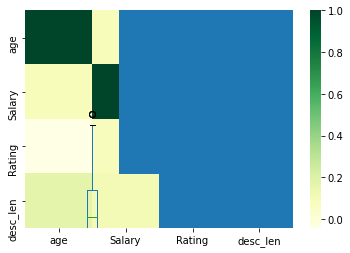

In [22]:
#some basic viz present in pandas by default
df['Rating'].hist()

df['Salary'].hist(bins=20)

df['desc_len'].hist()

df['Rating'].plot(kind='box')

cor=df[['age','Salary','Rating','desc_len']].corr()

sns.heatmap(cor,cmap='YlGn')

In [23]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'temp', 'Salary', 'company text', 'job_state', 'hq_state', 'same_state',
       'age', 'python_yn', 'R_yn', 'spark_yn', 'excel_yn', 'job_simp',
       'seniority', 'desc_len', 'comp_count'],
      dtype='object')

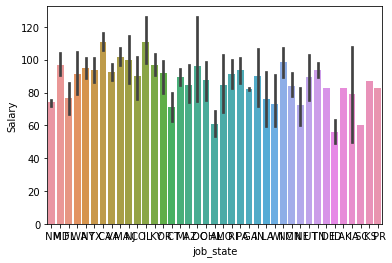

In [24]:
sns.barplot(x='job_state',y='Salary',data=df)

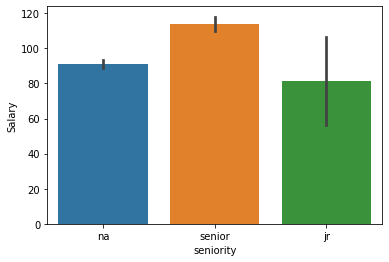

In [25]:
sns.barplot(x='seniority',y='Salary',data=df)

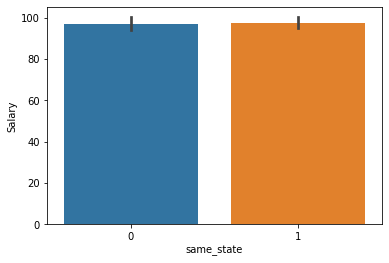

In [26]:
sns.barplot(x='same_state',y='Salary',data=df)

In [27]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'temp', 'Salary', 'company text', 'job_state', 'hq_state', 'same_state',
       'age', 'python_yn', 'R_yn', 'spark_yn', 'excel_yn', 'job_simp',
       'seniority', 'desc_len', 'comp_count'],
      dtype='object')

In [28]:
df_cat = df[['Location','Headquarters','Size','Type of ownership', 'Industry', 'Sector', 'Revenue','company text', 'job_state', 'hq_state', 'same_state',
       'age', 'python_yn', 'R_yn', 'spark_yn', 'excel_yn', 'job_simp',
       'seniority']]

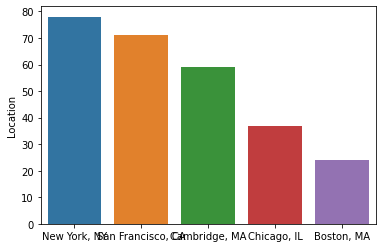

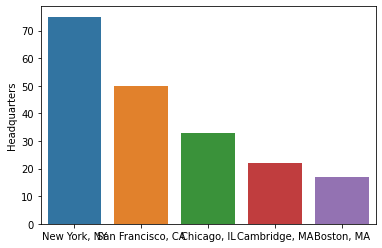

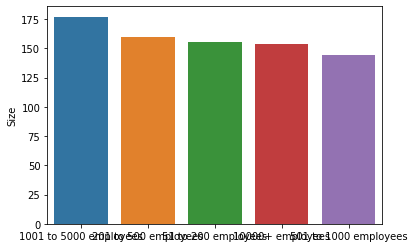

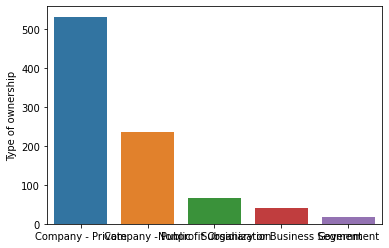

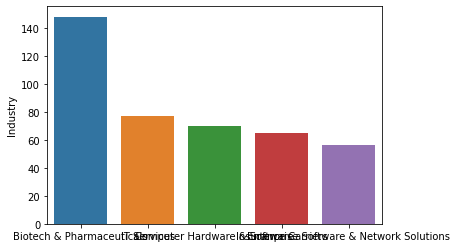

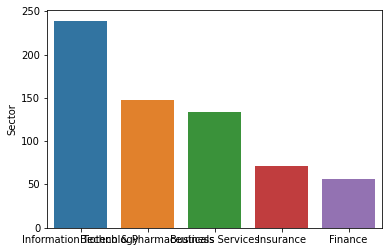

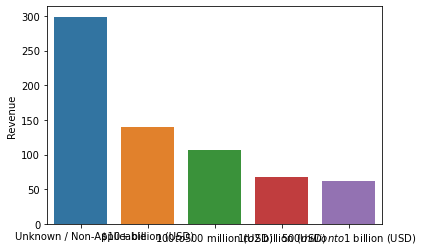

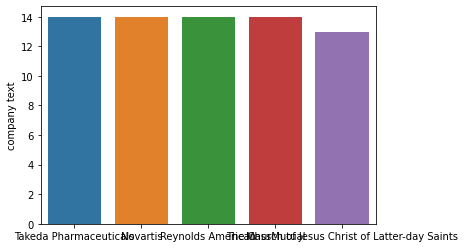

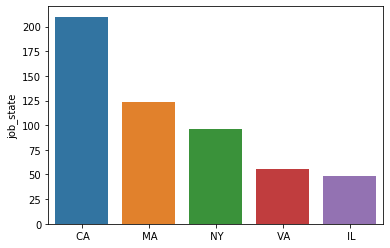

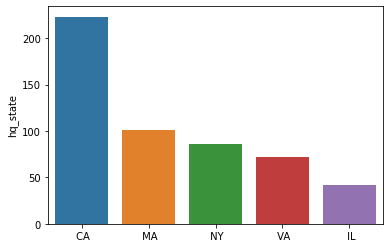

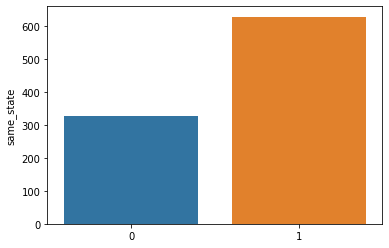

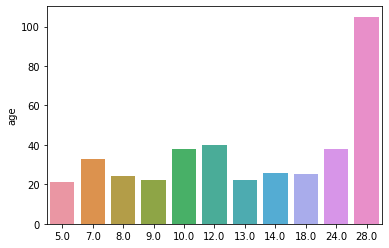

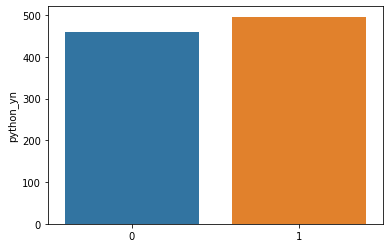

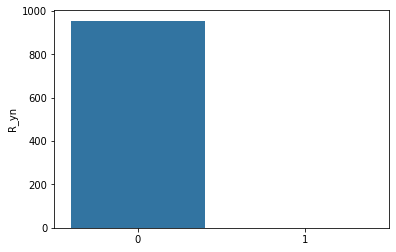

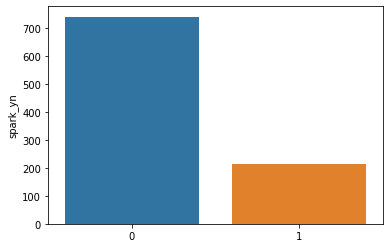

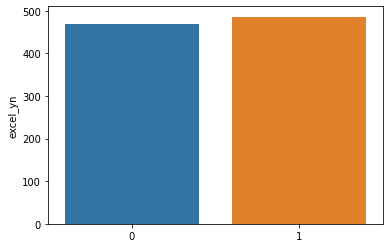

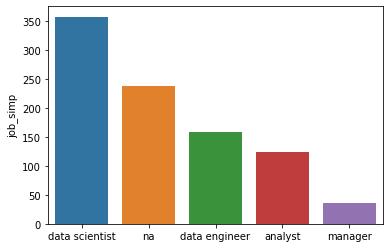

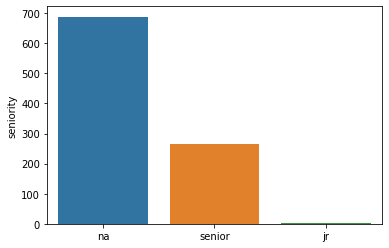

In [29]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()[:5]
    sns.barplot(x=cat_num.index,y=cat_num)
    plt.show()

In [30]:
#creating a pivot table according to the position and then state
pd.pivot_table(df,index=['job_simp','seniority'],values='Salary').sort_values('Salary',ascending=False)

pd.pivot_table(df,index=['job_simp','job_state'],values='Salary').sort_values('Salary',ascending=False)

Salary
job_simp       job_state            
director        IL        221.750000
                NJ        161.500000
mle             CA        141.937500
                IL        133.000000
data scientist  UT        126.125000
...                              ...
analyst         FL         52.571429
                LA         48.000000
                IA         43.000000
manager         MO         40.500000
analyst         CO         29.500000

[129 rows x 1 columns]

# Modelling

In [31]:
df = pd.read_csv('C:/Users/Jay/Desktop/Python/Projects/DS_Salary/eda_data.csv')

In [32]:
df_model = df[['avg_salary','Rating','Size','Type of ownership','Industry','Sector','Revenue','num_comp','hourly','employer_provided',
             'job_state','same_state','age','python_yn','spark','aws','excel','job_simp','seniority','desc_len']]

# get dummy data 
df_dum = pd.get_dummies(df_model)

# train test split 
from sklearn.model_selection import train_test_split

In [33]:
X = df_dum.drop('avg_salary', axis =1)
#'values' will create an array instead of series
y = df_dum.avg_salary.values

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Linear Model

In [35]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score

lm=LinearRegression()
lm.fit(X_train, y_train)
np.mean(cross_val_score(lm,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

#on average the salary that we are predicting is off by ~20K

-20.76685512891724

## Lasso

In [36]:
#by default alpha=1
lm_l = Lasso()
lm_l.fit(X_train,y_train)
np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

-21.0941474114959

-19.25779807999977

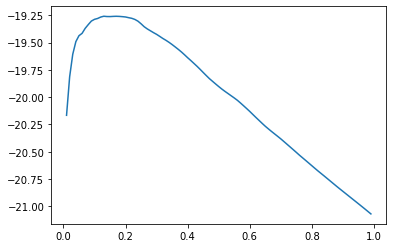

In [37]:
#we will check different values for alpha
alpha=[]
error=[]

for i in range(1,100):
    alpha.append(i/100)
    lm_l = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))

plt.plot(alpha,error)

err = tuple(zip(alpha,error))
err

df_err = pd.DataFrame(err, columns=['alpha','error'])
df_err[df_err.error == max(df_err.error)]

#best alpha is 0.13, so we will use that and check again
lm_l_alpha = Lasso(alpha=0.13)
lm_l_alpha.fit(X_train,y_train)
np.mean(cross_val_score(lm_l_alpha,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

## Random Forest

In [38]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

C:\Users\Jay\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [39]:
np.mean(cross_val_score(rf,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 3))

-16.219913603035433

In [40]:
#tuning with Gridsearch
from sklearn.model_selection import GridSearchCV

#parameters = {'n_estimators':range(10,300,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}
#this will take a lot of time to run

In [41]:
#now, we will predict
tpred_lm=lm.predict(X_test)
#tpred_lm_l=lm_l.predict(X_test)
tpred_lm_l_alpha=lm_l_alpha.predict(X_test)
tpred_rf=rf.predict(X_test)

In [42]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,tpred_lm))
print(mean_absolute_error(y_test,tpred_lm_l_alpha))
print(mean_absolute_error(y_test,tpred_rf))

18.855189990215326
19.665303712749914
11.564093959731544
